# Classification of Heart Disease Using K-Nearest Neighbor

In [3]:
# Load packages that will be used.
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
library(gridExtra)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

## Introduction
Many people die of cardiovascular diseases without knowing they have a problem with their heart. Unexpected deaths as such can be prevented with early diagnosis of cardiovascular issues and proper medication. When a patient comes to the hospital, there are many pieces of data such as symptoms, test results, and personal information that can help cariologists predict if heart disease is present. In this project, we are trying to answer: Can existing cardiovascular patient data and the KNN classification algorithm be used to detect the presence or absence of heart disease in new patients who enter the hospital? If so, how accurate could it be and how can we use it correctly in practice? The heart [disease dataset](https://archive.ics.uci.edu/ml/datasets/Heart+Disease) we are using is obtained from the UCI machine learning repository . It contains 303 patient instances and 14 attributes collected from Cleveland. Each row of the dataset corresponds to one patients personal and medical information upon entry to the hospital. 

This dataset contains the following variables: 
- `sex`: 1 = male; 0 = female
- `cp`: chest pain type (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic); 
- `trestbps`: resting blood pressure (in mm Hg on admission to hospital); 
- `chol`: serum cholesteral in mg/dl; 
- `fbs`: fasting blood sugar > 120 mg/dl (1 = true, 2 = false); 
- `restecg`: resting electrocardiographic results (0 = normal; 1 = having ST-T wave abnormality; 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria); 
- `thalach`: maximum heart rate achieved; 
- `exang`: exercise induced angina (1 = yes, 0 = no); 
- `oldpeak`: ST depression induced by exercise relative to rest; 
- `slope`: the slope of the peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping); 
- `ca`: number of major vessels (0-3) colored by flourosopy; 
- `thal`: type of defect (3 = normal, 6 = fixed defect, 7 = reversable defect); 
- `num`: diagnosis of heart disease (angiographic disease status) (0 = absence, 1, 2, 3, 4 = presence)

Our target variable would be `num`, which we later renamed as `diagnosis`. We selected `age`, `trestbps`, `chol`, `thalach`, and `oldpeak` as predictors to determine heart disease status.

## Methods and Results
### 1. Read the original dataset on the web

In [4]:
# Set the value of seed to ensure reproducibility
set.seed(200)

In [5]:
# Read the dataset from the web into a tibble dataframe
url <- 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
heart_cleve <- read_csv(url,col_names = FALSE)
# head(heart_cleve)

Parsed with column specification:
cols(
  X1 = col_double(),
  X2 = col_double(),
  X3 = col_double(),
  X4 = col_double(),
  X5 = col_double(),
  X6 = col_double(),
  X7 = col_double(),
  X8 = col_double(),
  X9 = col_double(),
  X10 = col_double(),
  X11 = col_double(),
  X12 = col_character(),
  X13 = col_character(),
  X14 = col_double()
)



### 2. Data Wrangling
The columns must be renamed from the placeholders that R created, to names that are meaningful and understandable to us. Here, we replaced them with the same names that were used in the original dataset, with the exception of `diagnosis` for ease, which was originally called `num`. 

Additionally, `ca` and `thal` were converted to numeric values like the rest of the variables, to prepare for use in the KNN algorithm.

In [6]:
# Rename the column names and Format the column types
heart_cleve <- rename(heart_cleve, age = X1,
               sex = X2,
               cp = X3,
               trestbps = X4,
               chol = X5,
               fbs = X6,
               restecg = X7,
               thalach = X8,
               exang = X9,
               oldpeak = X10,
               slope = X11,
               ca = X12,
               thal = X13,
               diagnosis = X14) %>% 
            mutate(ca = as.numeric(ca),thal = as.numeric(thal))
head(heart_cleve)

Warning message:
“Problem with `mutate()` input `ca`.
ℹ NAs introduced by coercion
ℹ Input `ca` is `as.numeric(ca)`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”
Warning message:
“Problem with `mutate()` input `thal`.
ℹ NAs introduced by coercion
ℹ Input `thal` is `as.numeric(thal)`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
56,1,2,120,236,0,0,178,0,0.8,1,0,3,0


The column `diagnosis` originally has the values 0-4, however, we are looking at presence versus absence of heart disease, which only requires 2 values. We will wrangle the data so that 0 indicates the absence of heart disease and 1 indicates the presence of heart disease

In [7]:
# Wrangle the `diagnosis` column: 0 indicates absence of heart disease and 1 indicates presence of heart disease.

heart_cleve$diagnosis[heart_cleve$diagnosis==2] <- 1
heart_cleve$diagnosis[heart_cleve$diagnosis==3] <- 1
heart_cleve$diagnosis[heart_cleve$diagnosis==4] <- 1
heart_cleve <- heart_cleve %>% mutate(diagnosis = as_factor(diagnosis))
head(heart_cleve)

# Source: https://www.geeksforgeeks.org/how-to-replace-specific-values-in-column-in-r-dataframe/

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
56,1,2,120,236,0,0,178,0,0.8,1,0,3,0


### 3. Data Exploration and Predictors Selection
#### Summary statistics of the Training data

The data will now be split into training and testing sets so that we can train and explore the data without compromising our accuracy results and to be able to test the efficacy of our model.

The training data will then be used to explore the data which can help us determine if we need to take additional steps to wrangle the data. Below we find that there is a fairly equal distribution between the two observations for diagnosis, therefore further steps do not have to be taken to balance them.

In [8]:
# Split the dataset into training and test sets
set.seed(200)
heart_cleve_selected <- heart_cleve %>%
                        select(age, trestbps, chol, thalach, oldpeak, diagnosis)
heart_split <- initial_split(heart_cleve_selected,prop=0.75,strata=diagnosis)
heart_train <- training(heart_split)
heart_test <- testing(heart_split)

In [9]:
# Summary Statistics of the training data

# Number of observations in each class
heart_sum_class <- heart_train %>% 
                group_by(diagnosis) %>%
                summarise(n=n(), percent=n()/nrow(heart_train)*100)
heart_sum_class

`summarise()` ungrouping output (override with `.groups` argument)



diagnosis,n,percent
<fct>,<int>,<dbl>
0,123,53.94737
1,105,46.05263


The following tibble gives us a thorough overview of the variables we are working with in a simple fashion. This can help us with understanding the predictors we are using and whether we need to do further wrangling.

In [1]:
# Summary statistics of predictor variables used in analysis
options(digits=2)
heart_percentile <- heart_train %>%
                    select(-diagnosis) %>%
                    map_df(quantile,na.rm = TRUE) 

heart_1stQ <- heart_percentile %>%
                select('25%') %>%
                t()%>%
                as.vector()

heart_3rdQ <- heart_percentile %>%
                select('75%') %>%
                t() %>%
                as.vector()

heart_mean <- heart_train%>% 
                    select(-diagnosis) %>%
                    map_df(mean,na.rm = TRUE)

heart_min <- heart_train %>%
                    select(-diagnosis) %>%
                    map_df(min,na.rm = TRUE)

heart_max <- heart_train %>%
                    select(-diagnosis) %>%
                    map_df(max,na.rm = TRUE)

heart_median <- heart_train %>%
                    select(-diagnosis) %>%
                    map_df(median,na.rm = TRUE)

heart_range <- heart_max - heart_min

heart_missing <- colSums(is.na(heart_train %>% select(-diagnosis)))
# Source: https://stackoverflow.com/questions/26273663/r-how-to-total-the-number-of-na-in-each-col-of-data-frame

heart_sum_pred <- rbind(heart_min, heart_1stQ, heart_median,heart_mean, heart_3rdQ, heart_max, heart_range, heart_missing) %>%
                    mutate(Statistics = c('Min','First Quartile','Median','Mean','Third Quartile','Max','Range','# of Missing Value'),.before = age)
heart_sum_pred

ERROR: Error in heart_train %>% select(-diagnosis) %>% map_df(quantile, na.rm = TRUE): could not find function "%>%"


#### Visualization of the Training data

Warning message:
“Removed 6 rows containing non-finite values (stat_density).”


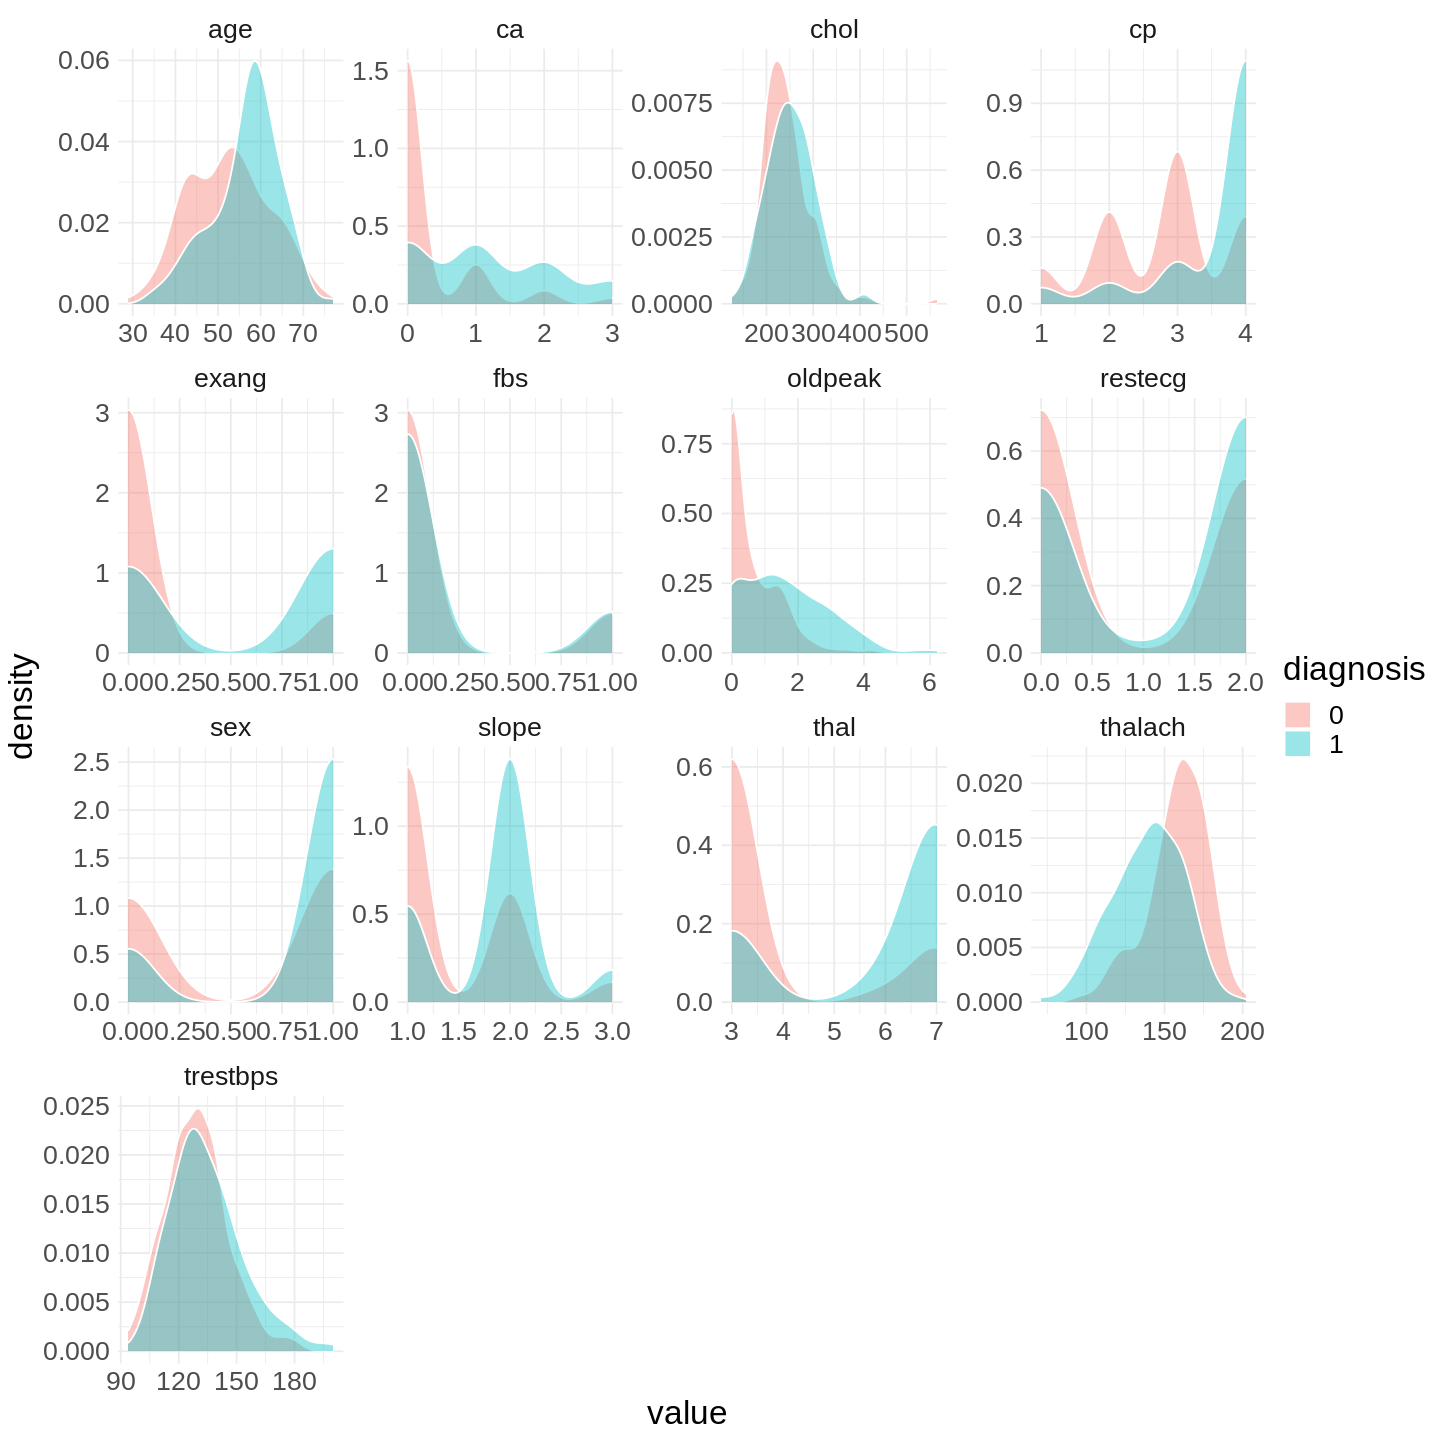

In [12]:
heart_cleve %>%
    pivot_longer(cols = -diagnosis, names_to = 'variables', values_to = 'value')  %>% 
    ggplot(aes(value, fill = diagnosis)) +
        geom_density(alpha = 0.4, colour = 'white') +
        facet_wrap(~ variables, scales = 'free') +
        theme_minimal() +
        theme(text = element_text(size = 20))

We chose to use `age`, `trestbps`, `chol`, `thalach` and `oldpeak` as our predictors because the density plots of these variables overlap less between the two classes compared to others. The less the classes overlap indicates it being a better predictor for the diagnosis of heart disease. 

### 4. Data Splitting
### 5. Model Training and Model Tuning using Cross-validation

We will now determine the best K value to use for maximum accuracy through a methodical approach outlined below.

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.61,10,0.031,Model01
3,accuracy,binary,0.61,10,0.018,Model02
5,accuracy,binary,0.67,10,0.037,Model03
7,accuracy,binary,0.70,10,0.041,Model04
9,accuracy,binary,0.70,10,0.026,Model05
11,accuracy,binary,0.67,10,0.024,Model06


[1] 43


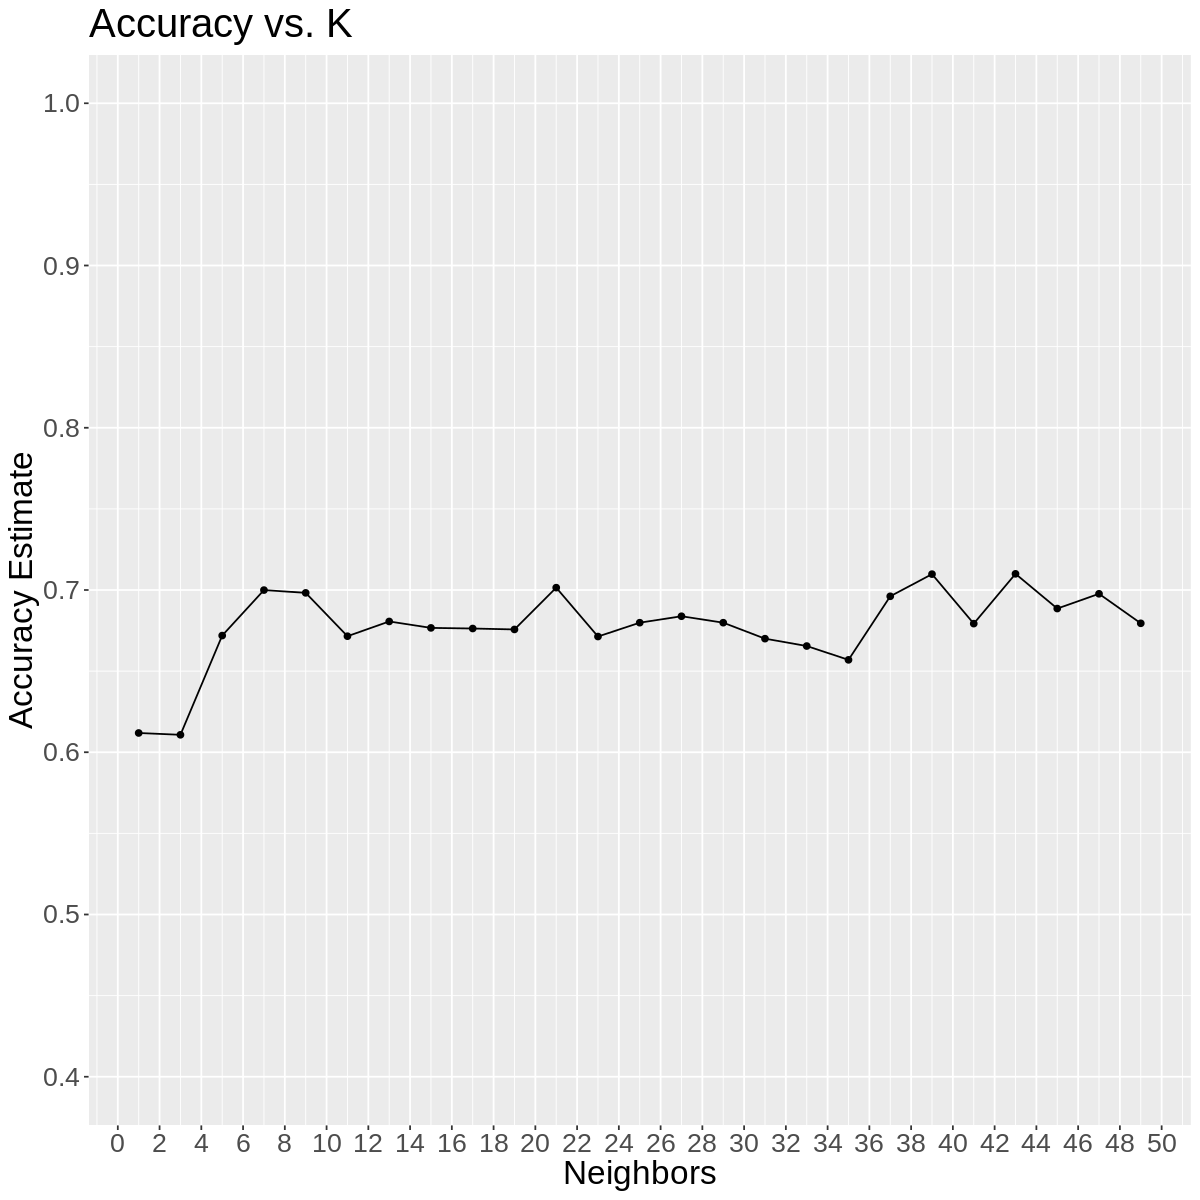

In [13]:
set.seed(200)
# Create the recipe that specifies class label and predictors, as well as preprocessing steps for all variables.
heart_recipe <- recipe(diagnosis ~ age + trestbps + chol + thalach + oldpeak, data = heart_train) %>%
                    step_scale(all_predictors()) %>%
                    step_center(all_predictors())
# heart_recipe


# Create a KNN model specification
heart_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
                    set_engine("kknn") %>%
                    set_mode("classification")
# heart_tune


# Split the training data for cross-validation
heart_vfold <- vfold_cv(heart_train, v = 10, strata = diagnosis)


# Create a dataframe with a neighbors variable that contains the sequence of values of K to try
k_vals <- tibble(neighbors=seq(from = 1, to = 50, by = 2))


# Create a workflow to train KNN classifiers and estimate the classifier accuracy for a range of K values.
heart_results <- workflow() %>%
                    add_recipe(heart_recipe) %>%
                    add_model(heart_tune) %>%
                    tune_grid(resamples = heart_vfold, grid = k_vals) %>%
                    collect_metrics()
# heart_results


# Filter the accuracy metric of classifers trained with different value of K
accuracies <- heart_results %>%
                    filter(.metric == "accuracy")
head(accuracies)


# Create a plot for accuracy vs. K
options (repr.plot.width = 10, repr.plot.height = 10)
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate") +
      scale_x_continuous(breaks = seq(0, 50, by = 2)) +  
      scale_y_continuous(limits = c(0.4, 1.0), breaks = seq (0.4, 1, by = 0.1)) +
      theme(text = element_text(size = 20)) +
      ggtitle('Accuracy vs. K')
accuracy_vs_k


# Pulling the optimal value of K
best_k <- accuracies %>%
            filter(mean==max(mean))%>%
            pull(neighbors)

print(best_k)

#### 6. Model Testing and Performance Evaluation

Finally, we will use our optimal K value obtained above to test our model against the testing data. The accuracy output will let us know how good our classifier is, and whether is is reasonable to be used in a healthcare setting where the diagnosis of heart disease is a urgent and important conclusion that requires high accuracy.

In [14]:
# Create a new model specification for the optimal K value
heart_best <- nearest_neighbor (weight_func = 'rectangular', neighbors = best_k) %>%
                set_engine ('kknn') %>%
                set_mode ('classification')

# Retrain the classifier
heart_fit <- workflow () %>%
                add_recipe (heart_recipe) %>%
                add_model (heart_best) %>%
                fit (data = heart_train)

# Use the classifer to predict on the testing set 
heart_diagnosis_pred <- predict(heart_fit, heart_test) %>%
                            bind_cols(heart_test) 

# Collect evaluation metrics -- Accuracy
heart_accuracy <- heart_diagnosis_pred %>%
                        metrics(truth = diagnosis, estimate = .pred_class)%>%
                        filter(.metric == 'accuracy') %>%
                        select(.estimate) %>%
                        pull()

paste("The estimated Accuracy is:", as.character(heart_accuracy))


# Present the Confusion Matrix
confusion <- heart_diagnosis_pred %>%
                conf_mat(truth = diagnosis, estimate = .pred_class)
paste("Confusion Matrix:")
confusion

[1] "The estimated Accuracy is: 0.733333333333333"

[1] "Confusion Matrix:"

          Truth
Prediction  0  1
         0 33 12
         1  8 22

#### 7. Visualizing the Predition results

Since humans register data well visually, we have plotted our prediction accuracy.

In [15]:
# To add an index column to the data frame.
heart_diagnosis_pred$index <- 1:nrow(heart_diagnosis_pred)
head(heart_diagnosis_pred)

# Source: https://www.statology.org/add-index-column-to-data-frame-r/

.pred_class,age,trestbps,chol,thalach,oldpeak,diagnosis,index
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<int>
1,67,160,286,108,1.5,1,1
1,66,150,226,114,2.6,0,2
1,69,140,239,151,1.8,0,3
0,64,140,335,158,0.0,1,4
0,44,130,233,179,0.4,0,5
1,61,150,243,137,1.0,0,6


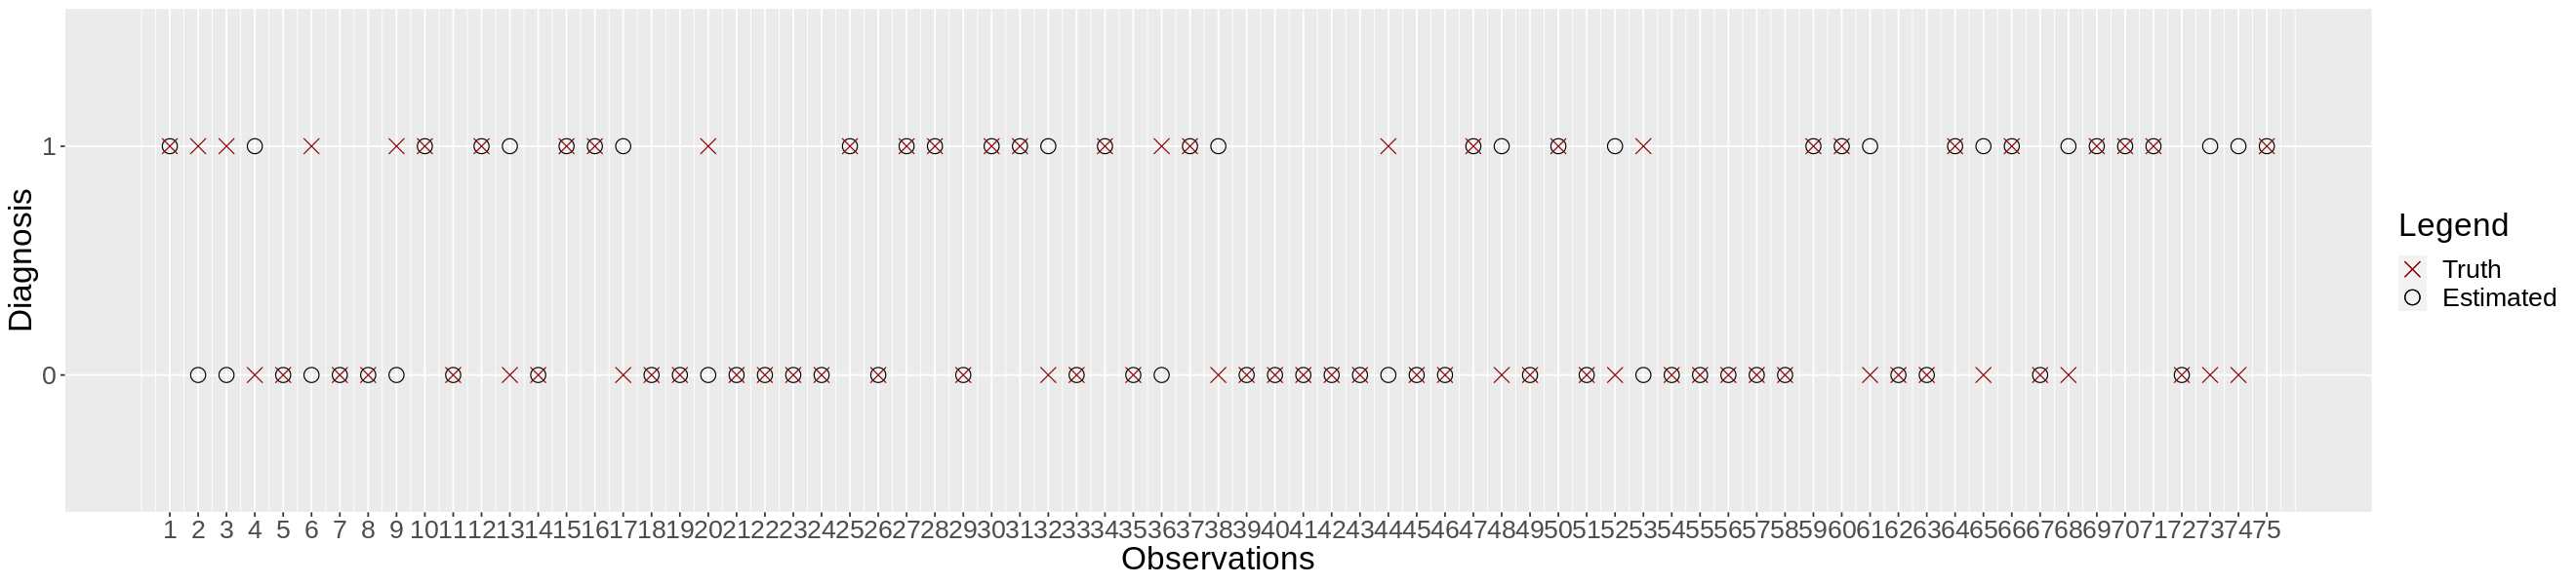

In [16]:
options(repr.plot.width=22,repr.plot.height=5)

colors <- c("Truth" = "black", "Estimated" = "#8B0000")
shapes <- c("truth" = 1, "estimated" = 4)
mapping <- ggplot(heart_diagnosis_pred,aes(x=index)) +
            geom_point(aes(y=diagnosis, color= 'Truth',shape='truth'),size=4)+
            geom_point(aes(y=.pred_class, color='Estimated',shape='estimated'),size=4)+
            scale_x_continuous(breaks=1:nrow(heart_diagnosis_pred)) +
            labs(x='Observations',y='Diagnosis',shape="",color="")+
            scale_color_manual(name="Legend", labels=c("Truth","Estimated"),values=colors)+
            scale_shape_manual(name="Legend", labels=c("Truth","Estimated"),values=shapes)+
            theme(text=element_text(size=20))
mapping

# Source: 
# http://www.sthda.com/english/wiki/r-plot-pch-symbols-the-different-point-shapes-available-in-r
# https://stackoverflow.com/questions/12410908/combine-legends-for-color-and-shape-into-a-single-legend
# https://community.rstudio.com/t/adding-manual-legend-to-ggplot2/41651/4

## Discussion
- summarize what you found
- discuss whether this is what you expected to find?
- discuss what impact could such findings have?
- discuss what future questions could this lead to?

We have created a classifier to answer the question: can existing cardiovascular patient data and the KNN classification algorithm be used to detect the presence or absence of heart disease in new patients who enter the hospital? Using the K Nearest Neighbors algorithm that predicts the presence or absence of heart disease with predictors, `age`, `trestbps`, `chol`, `thalach`, and `oldpeak`, we were able to answer this question. Determining an optimal K value of 43, our classifier returned an estimated accuracy of 73%. This is a low accuracy, especially since the implications of the classifier predicting incorrectly can be fatal. Upon initial examination of the dataset itself, the variables included seemed promising and we expected that the classifier would have a high accuracy. For instance, the potential predictors of chest pain type, age, exercise induced angina, type of defect, and resting electrocardiogram results appeared to be closely related to whether the patient would have a heart defect or not. Note that this conclusion was made purely from a qualitative perspective, using common knowledge. Upon consultation with the literature, cholesterol levels appears to be one of the strongest predictors of heart disease as it has the potential to create plaque buildup in the arteries (Fernandez & Webb, 2008; Roland, 2017). Once we conducted our own exploratory data analysis, it became clear that the majority of these predictors were formatted as categorical variables that are not conducive to the KNN algorithm. We decided to use the serum cholesterol level indicator due to the research we did, and others from the density plot that we created for exploratory data visualization. At this point, our expectations shifted to a less optimistic view of our results. Knowing that many of the predictors that we intuitively felt were strongly correlated with heart disease were not able to be used, we expected a lower accuracy rate. The inability to use categorical variables in our classifier is the main limitation of this report. In the future, it would be useful to ask what other numerical data could be used as strong predictors for heart disease. These could then be entered into a new dataset and tested for accuracy. The hope would be a higher accuracy estimate, where the classifier could potentially be used to build support systems to help clinicians to make better decisions on when to take precautionary steps due to suspected heart disease.

## References
- At least 2 citations of literature relevant to the project (format is your choice, just be consistent across the references).
- Make sure to cite the source of your data as well.

Fernandez, M. L., & Webb, D. (2008). The LDL to HDL Cholesterol Ratio as a Valuable Tool to Evaluate Coronary Heart Disease Risk. Journal of the American College of Nutrition, 27(1), 1–5. https://doi.org/10.1080/07315724.2008.10719668

Roland, J. (2017, January 30). Serum Cholesterol: Understanding Your Levels. Healthline. https://www.healthline.com/health/serum-cholesterol#results


## Expected Outcomes and Significance (Not included in the report, just for reference)
We are expecting that the medical information that can be readily collected from the patients together with the classifier built under the KNN algorithm can facilitate the diagnosis and prediction of heart diseases. If our project can support the above finding, we will be able to draw insights into building decision support systems to help clinicians to make better decisions on the necessity to take precautionary steps. Future questions would be what other relevant variables can be included in the model and how we could further improve the prediction accuracy of the classifier.


# Logic
### 1. Data Wrangling
### 2. Data Exploration and Predictors Selection
We reviewed heart disease-related literature to select predictors to include in the classification task. To better understand our dataset, we implemented exploratory data analysis.
We used `age`, `trestbps` (resting blood pressure on admission to hospital in mm Hg), `chol` (serum cholesterol in mg/dl), `thalach` (maximum heart rate achieved), and `oldpeak` (ST depression induced by exercise relative to rest), as predictors. We selected them among the 13 available variables as they are quantitive variables suited for the KNN algorithm, rather than categorical variables that would not be ideal for the algorithm since the values would be organized in to set vertical lines.   
### 3. Data Modeling（training set） 

- ***Data Splitting***  
  The dataset is split into two sets with a percentage assignment: training set (75%) and testing set (25%). 

- ***Model Training***  
  The *K-Nearest Neighbor* algorithm was used to train the classifier for heart disease classification. To find the optimal classifier, we went through the model tuning process to find the optimal value of K for better accuracy.
  
    - ***Model Tuning***  
  Cross-validation was used to tune the classifier. The training set was split into C folds and iteratively, C-1 folds were used as the training set to train the classifier and 1 fold was used as a validation set to calculate the prediction accuracy. In our project, C is chosen to be either 5 or 10.
  
### 4. Model Testing and Performance Evaluation (testing set)  
The predicted results and the true results were compared to evaluate the prediction power of the classifier. Specifically, the *Accuracy* metric was used for performance evaluation. A confusion matrix was generated to present the predicted results.

### 5. Results Visualization
We used the line plot with the scatter plot to present the K-vs.-Accuracy relationship to find out the opitmal value of K to train the classifier. We also added a scatter plot that presents the mapping of the actual labels and predicted labels.

The grid below helps us visualize the correlation between the variables we have decided to use to see how they might interact with each other to create our prediction output. It will  help us understand the significance of each predictor in our model. 

In [ ]:
options(repr.plot.width=12,repr.plot.height = 12)

ggpairs(heart_train, columns = 1:5, ggplot2::aes(colour = diagnosis)) 

# Source: https://www.r-graph-gallery.com/199-correlation-matrix-with-ggally.html#:~:text=The%20ggpairs()%20function%20of,is%20available%20on%20the%20diagonal.